In [25]:
import pandas as pd

In [26]:
path = "../../outputs/databases/df4_features_merge.csv"

In [27]:
pd.set_option('display.max_columns', 500)

In [28]:
df = pd.read_csv(path)
df = df.dropna()

In [6]:
df.describe()

,Unnamed: 0,guardian_id,group_id,n_kids,n_males,n_females,male,female,private,C1,C2,C3,P1,P2,n_group_members,n_interacting_guardians_daily,Other,DA,NR,SV,FM,GroupReportCard,CreateVideoCompilation,ManualCertificate,QF,n_moderator_messages,n_distinct_moderators_daily,0-2,3-5,6-8,9-11,12-14,15-17,18-20,21-23,hi,mr,Activity,Rhyme,Story,Worksheet,Easy,Hard,Medium,Image,OtherResponseType,Video,Voice_Note,text,Both(Pre-Primary I (3-4 years) and Pre-Primary II (5-6 years)),Both(Primary I (6-7 years) and Primary II (7-8 years)),Pre-Primary I (3-4 years),Pre-Primary II (5-6 years),Primary I (6-7 years),Complex supplies,Household Objects,OtherLearningDomain,Simple supplies,ModMessageTypeAudio,ModMessageTypeChat,ModMessageTypeDocument,ModMessageTypeImage,ModMessageTypeSticker,ModMessageTypeVideo,mod_message_length_daily,n_individual_guardian_interactions_daily,week_cumulative_n_guardian_messages,month_cumulative_n_guardian_messages,guardian_interacted,weekly_cumulative_guardian_n_days_interacted,monthly_cumulative_guardian_n_days_interacted,weekly_guardian_interaction_indicator,monthly_guardian_interaction_indicator,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6
count,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.0,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000,108957.000000
mean,80868.399313,197984.409244,24272.868893,2.140615,0.907734,1.112072,0.481025,0.526391,0.000863,0.216517,0.043898,0.006149,0.297172,0.541828,41.871114,4.262838,0.103701,1.0,0.647705,0.003589,0.104555,0.170030,0.004369,0.330139,0.009141,5.852272,1.042154,0.706462,0.157759,0.117634,0.397790,0.228971,0.195609,0.156273,0.048175,0.072432,0.989923,0.979790,0.119111,0.165891,0.060703,0.868131,0.169994,0.475894,0.418009,0.006314,0.937462,0.009343,0.003561,0.832741,0.006002,0.155456,0.532632,0.103353,0.319319,0.657737,0.029948,0.285094,0.103582,0.948466,0.012170,0.291454,0.002184,0.244317,203.934405,0.847821,6.022816,21.577512,0.262645,1.417623,6.411153,0.452279,0.612141,0.160751,0.220252,0.163239,0.178823,0.096313,0.002010
std,40581.309638,135875.194301,10466.649068,3.138486,1.958632,2.718478,0.499642,0.499305,0.029360,0.411872,0.204869,0.078176,0.457015,0.498250,22.575403,3.797007,0.304874,0.0,0.477687,0.059797,0.305981,0.375661,0.065952,0.470265,0.095172,7.809286,0.607262,0.455385,0.364517,0.322175,0.489444,0.420173,0.396671,0.363115,0.214137,0.259203,0.099879,0.140718,0.323921,0.371985,0.238786,0.338349,0.375629,0.499421,0.493234,0.079212,0.242132,0.096208,0.059568,0.373208,0.077242,0.362340,0.498936,0.304420,0.466215,0.474469,0.170444,0.451461,0.304719,0.221085,0.109645,0.454434,0.046686,0.429683,304.705215,2.093188,10.475362,35.005482,0.440073,1.930617,8.177449,0.497720,0.487264,0.367303,0.414418,0.369585,0.383206,0.295022,0.044788
min,47.000000,59912.000000,17763.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00

In [215]:
df.columns

Index(['Unnamed: 0', 'guardian_id', 'group_id', 'n_kids', 'n_males',
       'n_females', 'male', 'female', 'private', 'C1', 'C2', 'C3', 'P1', 'P2',
       'n_group_members', 'day', 'n_interacting_guardians_daily', 'Other',
       'DA', 'NR', 'SV', 'FM', 'GroupReportCard', 'CreateVideoCompilation',
       'ManualCertificate', 'QF', 'n_moderator_messages',
       'n_distinct_moderators_daily', '0-2', '3-5', '6-8', '9-11', '12-14',
       '15-17', '18-20', '21-23', 'hi', 'mr', 'Activity', 'Rhyme', 'Story',
       'Worksheet', 'Easy', 'Hard', 'Medium', 'Image', 'OtherResponseType',
       'Video', 'Voice_Note', 'text',
       'Both(Pre-Primary I (3-4 years) and Pre-Primary II (5-6 years))',
       'Both(Primary I (6-7 years) and Primary II (7-8 years))',
       'Pre-Primary I (3-4 years)', 'Pre-Primary II (5-6 years)',
       'Primary I (6-7 years)', 'Complex supplies', 'Household Objects',
       'OtherLearningDomain', 'Simple supplies', 'ModMessageTypeAudio',
       'ModMessageTypeChat',

In [216]:
df = df[df["n_group_members"] > 1]

In [218]:
df["n_interacting_guardians_daily"] -= df["guardian_interacted"]

<AxesSubplot:xlabel='n_kids', ylabel='guardian_interacted'>

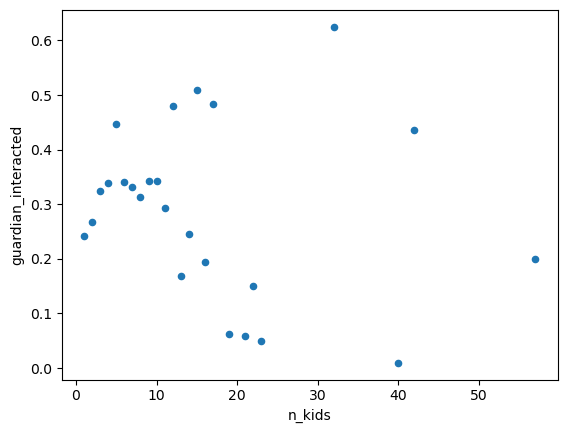

In [219]:
# mean interaction indicator with varying number of kids
df.groupby("n_kids")["guardian_interacted"].mean().reset_index().plot.scatter(x="n_kids",y="guardian_interacted")

In [220]:
df.groupby("male")["guardian_interacted"].mean()

male
0.0    0.268585
1.0    0.256183
Name: guardian_interacted, dtype: float64

In [221]:
df.groupby("female")["guardian_interacted"].mean()

female
0.0    0.257210
1.0    0.267486
Name: guardian_interacted, dtype: float64

In [222]:
df.groupby("private")["guardian_interacted"].mean()

private
0.0    0.262653
1.0    0.223404
Name: guardian_interacted, dtype: float64

<AxesSubplot:xlabel='n_group_members', ylabel='guardian_interacted'>

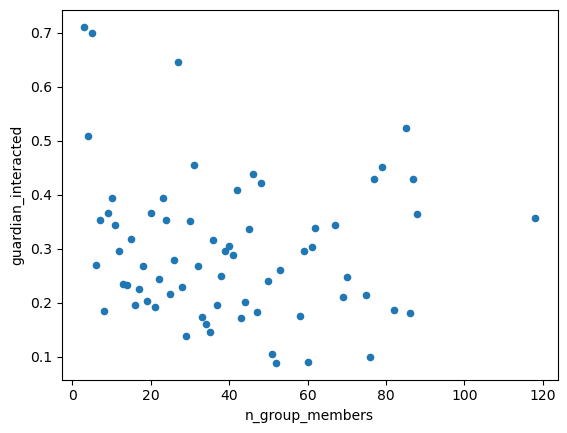

In [223]:
df.groupby("n_group_members")["guardian_interacted"].mean().reset_index().plot.scatter(x="n_group_members",y="guardian_interacted")

<AxesSubplot:>

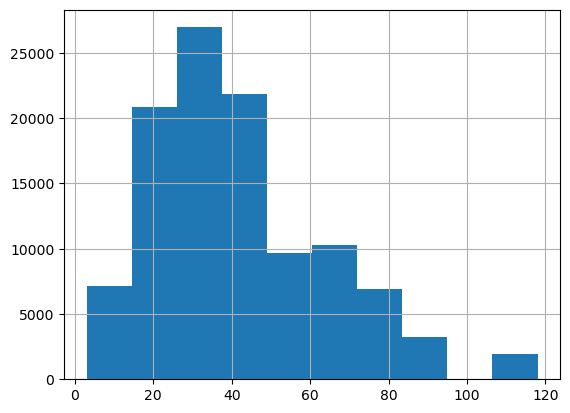

In [224]:
df["n_group_members"].hist()

<AxesSubplot:xlabel='n_interacting_guardians_daily', ylabel='guardian_interacted'>

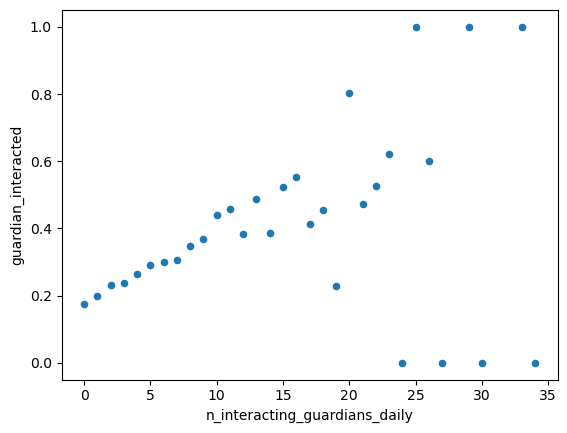

In [225]:
df.groupby("n_interacting_guardians_daily")["guardian_interacted"].mean().reset_index().plot.scatter(x="n_interacting_guardians_daily",y="guardian_interacted")

<AxesSubplot:>

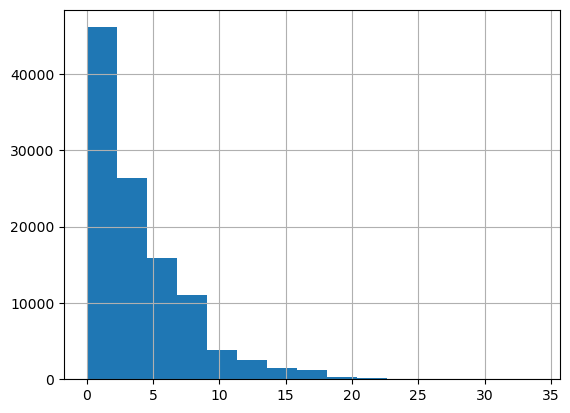

In [226]:
df["n_interacting_guardians_daily"].hist(bins=15)

In [7]:
df["proportion_guardians_interacted_daily"] = df["n_interacting_guardians_daily"]/df["n_group_members"]

<AxesSubplot:xlabel='proportion_guardians_interacted_daily', ylabel='guardian_interacted'>

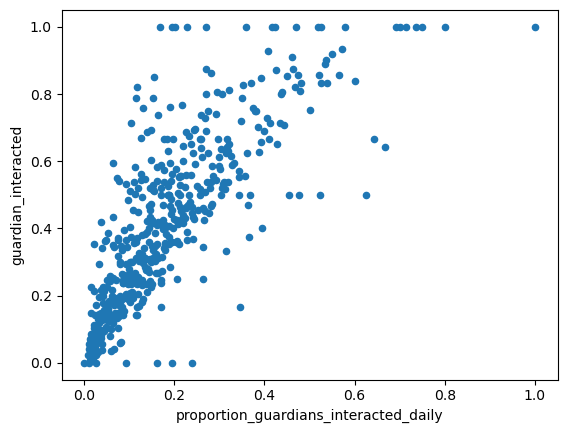

In [8]:
df.groupby("proportion_guardians_interacted_daily")["guardian_interacted"].mean().reset_index().plot.scatter(x="proportion_guardians_interacted_daily",y="guardian_interacted")

<AxesSubplot:>

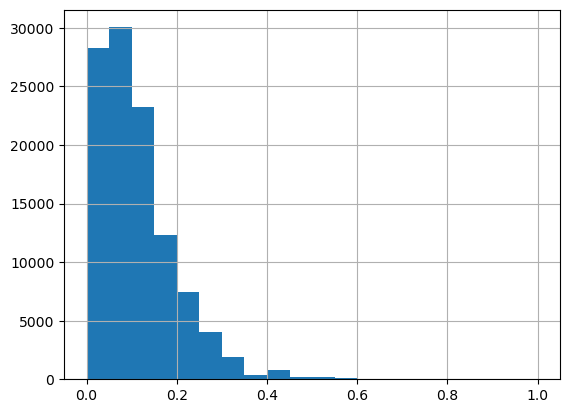

In [13]:
df["proportion_guardians_interacted_daily"].hist(bins=20)

In [29]:
for c in ["C1","C2","C3","P1","P2"]:
    print(c, df[df[c]==1].shape[0])

C1 23591
C2 4783
C3 670
P1 32379
P2 59036


In [17]:
meanc1=df[df["C1"]==1]["guardian_interacted"].mean()-df[df["C1"]==0]["guardian_interacted"].mean()
meanc2=df[df["C2"]==1]["guardian_interacted"].mean()-df[df["C1"]==0]["guardian_interacted"].mean()
meanc3=df[df["C3"]==1]["guardian_interacted"].mean()-df[df["C1"]==0]["guardian_interacted"].mean()
meanp1=df[df["P1"]==1]["guardian_interacted"].mean()-df[df["C1"]==0]["guardian_interacted"].mean()
meanp2=df[df["P2"]==1]["guardian_interacted"].mean()-df[df["C1"]==0]["guardian_interacted"].mean()

In [15]:
print(f"C1: {meanc1}")
print(f"C2: {meanc2}")
print(f"C3: {meanc3}")
print(f"P1: {meanp1}")
print(f"P2: {meanp2}")

C1: 0.2526387181552287
C2: 0.2205728622203638
C3: 0.43582089552238806
P1: 0.2486179313752741
P2: 0.295514601260248


In [18]:
print(f"C1: {meanc1}")
print(f"C2: {meanc2}")
print(f"C3: {meanc3}")
print(f"P1: {meanp1}")
print(f"P2: {meanp2}")

C1: -0.012771398284571689
C2: -0.0448372542194366
C3: 0.17041077908258767
P1: -0.016792185064526288
P2: 0.030104484820447586


In [231]:
intervention_types = ['Other', 'NR', 'SV', 'FM', 'GroupReportCard', 'CreateVideoCompilation', 'ManualCertificate', 'QF']

for it in intervention_types:
    
    mean_it = df[df[it]==1]["guardian_interacted"].mean()
    
    print(f"Intervention type {it}: {mean_it}")

Intervention type Other: 0.31377234908833423
Intervention type NR: 0.2615251619120502
Intervention type SV: 0.3657289002557545
Intervention type FM: 0.22546093064091308
Intervention type GroupReportCard: 0.23361408055285607
Intervention type CreateVideoCompilation: 0.25630252100840334
Intervention type ManualCertificate: 0.2879701965581473
Intervention type QF: 0.20883534136546184


In [37]:
intervention_types = ['Other', 'NR', 'SV', 'FM', 'GroupReportCard', 'CreateVideoCompilation', 'ManualCertificate', 'QF']

for i in intervention_types:
    print(i, df[df[i]==1].shape[0])

Other 11299
NR 70572
SV 391
FM 11392
GroupReportCard 18526
CreateVideoCompilation 476
ManualCertificate 35971
QF 996


<AxesSubplot:>

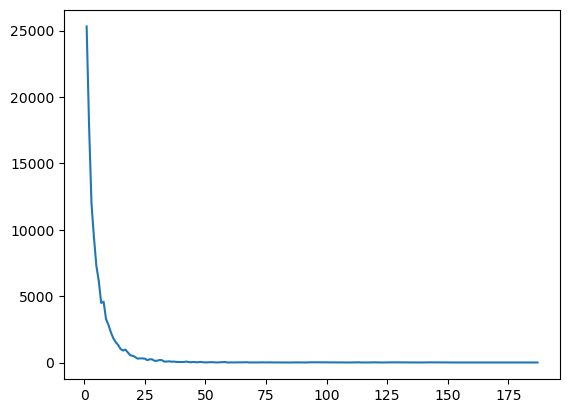

In [232]:
df[""].value_counts().sort_index().plot()

<AxesSubplot:xlabel='n_moderator_messages', ylabel='guardian_interacted'>

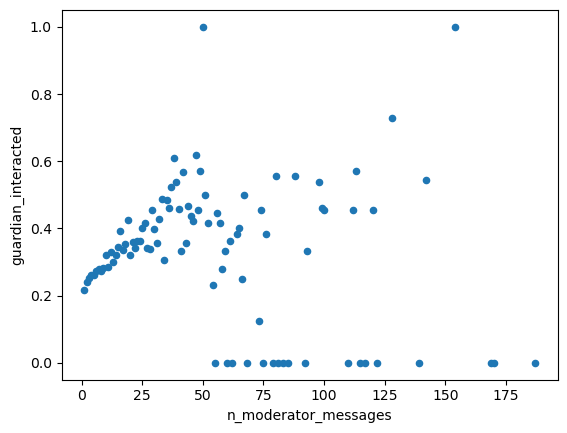

In [233]:
df.groupby("n_moderator_messages")["guardian_interacted"].mean().reset_index().plot.scatter(x="n_moderator_messages",y="guardian_interacted")

<AxesSubplot:xlabel='n_moderator_messages', ylabel='guardian_interacted'>

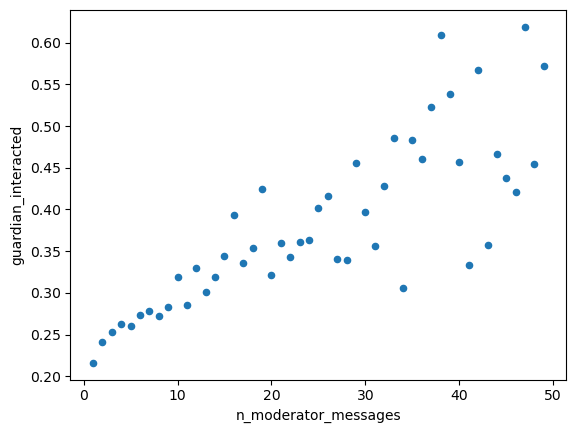

In [234]:
df[df["n_moderator_messages"]<50].groupby("n_moderator_messages")["guardian_interacted"].mean().reset_index().plot.scatter(x="n_moderator_messages",y="guardian_interacted")

In [235]:
DA_hours = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23']

for h in DA_hours:
    
    mean_h = df[df[h]==1]["guardian_interacted"].mean()
    nobs = df[df[h]==1].shape[0]
    
    print(f"DA hour rage {h}: {round(mean_h,2)} on {nobs} observations")

DA hour rage 0-2: 0.26 on 76963 observations
DA hour rage 3-5: 0.26 on 17185 observations
DA hour rage 6-8: 0.28 on 12817 observations
DA hour rage 9-11: 0.26 on 43334 observations
DA hour rage 12-14: 0.31 on 24946 observations
DA hour rage 15-17: 0.29 on 21312 observations
DA hour rage 18-20: 0.32 on 17027 observations
DA hour rage 21-23: 0.24 on 5249 observations


In [236]:
activity_types = ['Rhyme', 'Story', 'Worksheet']

for at in activity_types:
    
    mean_at = df[df[at]==1]["guardian_interacted"].mean()
    
    print(f"Activity type {at}: {mean_at}")

Activity type Rhyme: 0.24281420975572165
Activity type Story: 0.2571238864604659
Activity type Worksheet: 0.21832476564862413


In [237]:
difficulties = ["Easy","Medium","Hard"]

for d in difficulties:
    
    mean_d = df[df[d]==1]["guardian_interacted"].mean()
    
    print(f"Difficulty type {d}: {mean_d}")

Difficulty type Easy: 0.2656621728786677
Difficulty type Medium: 0.26295789047279183
Difficulty type Hard: 0.26474082073434124


In [33]:
df["Preprimary"] = (df["P1"] + df["P2"] > 0).astype(int)
df["Primary"] = (df["C1"]+df["C2"]+df["C3"]>0).astype(int)

In [23]:
df[df["Preprimary"]==1]["guardian_interacted"].mean()

0.2736926605504587

In [24]:
df[df["Primary"]==1]["guardian_interacted"].mean()

0.25396825396825395

In [34]:
df["Primary_Activity"]=(df["Primary I (6-7 years)"]+df["Both(Primary I (6-7 years) and Primary II (7-8 years))"]>0).astype(int)
df["Preprimary_Activity"]=(df["Both(Pre-Primary I (3-4 years) and Pre-Primary II (5-6 years))"]+df["Pre-Primary I (3-4 years)"]+df["Pre-Primary II (5-6 years)"]>0).astype(int)

In [241]:
df[df["Preprimary_Activity"]==1]["guardian_interacted"].mean(), df[df["Primary_Activity"]==1]["guardian_interacted"].mean()

(0.2624715129528859, 0.2531900604432505)

In [35]:
df["Activity_matching_class"] = (((df["Primary_Activity"]==1) & (df["Primary"]==1)) | ((df["Preprimary_Activity"]==1) & (df["Preprimary"]==1))).astype(int)

In [36]:
df["Activity_matching_class"].mean()

0.8106959626274586

In [243]:
df[["Primary_Activity","Primary","Preprimary_Activity","Preprimary","Activity_matching_class"]]

,Primary_Activity,Primary,Preprimary_Activity,Preprimary,Activity_matching_class
47,0,0,1,1,1
48,0,0,1,1,1
49,0,0,1,1,1
50,0,0,1,1,1
51,0,0,1,1,1
...,...,...,...,...,...
145763,0,0,1,1,1
145764,1,0,1,1,1
145765,0,0,1,1,1
145766,1,0,1,1,1


In [250]:
df[df["Activity_matching_class"]==1]["guardian_interacted"].mean() - df[df["Activity_matching_class"]==0]["guardian_interacted"].mean()

0.05028359063459445

In [253]:
DA_response_types = ['Image','Video','Voice_Note','OtherResponseType']

for dt in DA_response_types:
    
    mean_dt = df[df[dt]==1]["guardian_interacted"].mean()
    
    print(f"DA response type {dt}: {mean_dt}")

DA response type Image: 0.2598765838768474
DA response type Video: 0.2638185788283216
DA response type Voice_Note: 0.23280943025540274
DA response type OtherResponseType: 0.19359534206695778


In [251]:
learning_domains = ['Complex supplies', 'Household Objects', 'OtherLearningDomain', 'Simple supplies']

for ld in learning_domains:
    
    mean_ld = df[df[ld]==1]["guardian_interacted"].mean()
    
    print(f"Learning domain {ld}: {mean_ld}")

Learning domain Complex supplies: 0.2531336246550138
Learning domain Household Objects: 0.2652366265194758
Learning domain OtherLearningDomain: 0.2160588415568495
Learning domain Simple supplies: 0.2616157388028464


In [255]:
mod_response_types = ['ModMessageTypeAudio','ModMessageTypeChat', 'ModMessageTypeDocument', 'ModMessageTypeImage','ModMessageTypeSticker', 'ModMessageTypeVideo']

for mt in mod_response_types:
    
    mean_mt = df[df[mt]==1]["guardian_interacted"].mean()
    nobs = df[df[mt]==1].shape[0]
    
    print(f"Moderator response type {mt}: {mean_mt} on {nobs} observations")

Moderator response type ModMessageTypeAudio: 0.25620347394540943 on 11284 observations
Moderator response type ModMessageTypeChat: 0.26963573723531914 on 103332 observations
Moderator response type ModMessageTypeDocument: 0.23001508295625941 on 1326 observations
Moderator response type ModMessageTypeImage: 0.2693833847704226 on 31754 observations
Moderator response type ModMessageTypeSticker: 0.15546218487394958 on 238 observations
Moderator response type ModMessageTypeVideo: 0.26012472762792094 on 26618 observations


<AxesSubplot:>

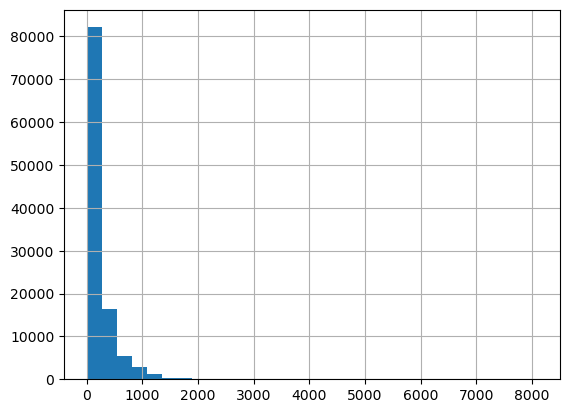

In [261]:
df["mod_message_length_daily"].hist(bins=30)

<AxesSubplot:>

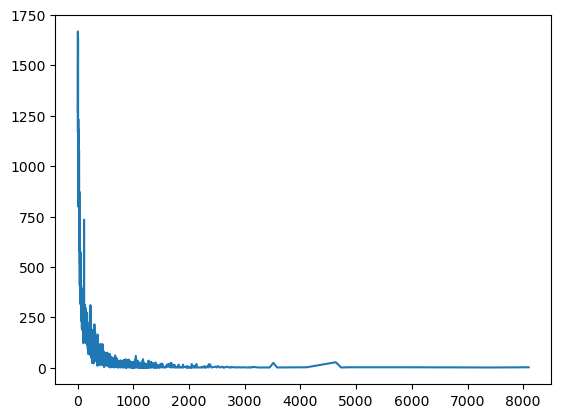

In [264]:
df["mod_message_length_daily"].value_counts().sort_index().plot()

<AxesSubplot:xlabel='mod_message_length_daily', ylabel='guardian_interacted'>

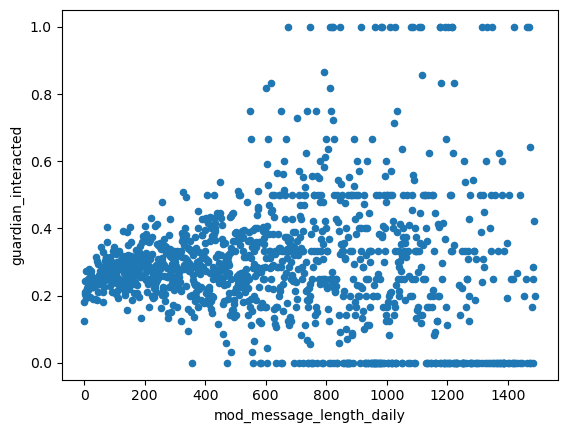

In [267]:
df[df["mod_message_length_daily"]<1500].groupby("mod_message_length_daily")["guardian_interacted"].mean().reset_index().plot.scatter(x="mod_message_length_daily",y="guardian_interacted")

In [269]:
df["weekly_cumulative_guardian_n_days_interacted"].value_counts()

0.0    59669
1.0    11714
2.0     8803
3.0     8131
4.0     7832
5.0     7364
6.0     5428
Name: weekly_cumulative_guardian_n_days_interacted, dtype: int64

<AxesSubplot:xlabel='weekly_cumulative_guardian_n_days_interacted', ylabel='guardian_interacted'>

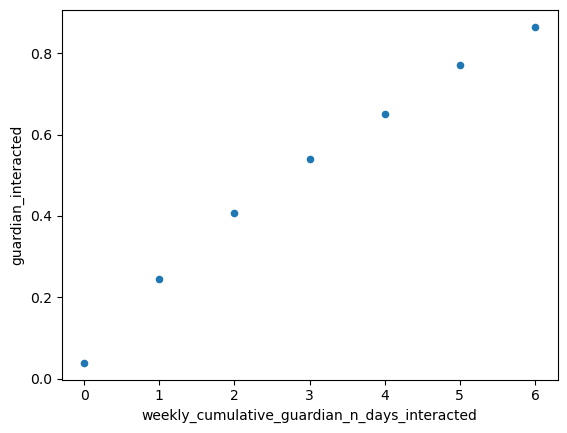

In [270]:
df.groupby("weekly_cumulative_guardian_n_days_interacted")["guardian_interacted"].mean().reset_index().plot.scatter(x="weekly_cumulative_guardian_n_days_interacted",y="guardian_interacted")

In [272]:
df["monthly_cumulative_guardian_n_days_interacted"].value_counts()

0.0     42251
1.0      9206
2.0      5356
3.0      4285
4.0      3430
5.0      3071
6.0      2931
7.0      2588
8.0      2257
10.0     2233
9.0      2209
11.0     2095
12.0     1982
13.0     1929
14.0     1893
15.0     1862
17.0     1818
16.0     1766
19.0     1743
18.0     1733
20.0     1690
21.0     1594
22.0     1581
23.0     1515
24.0     1351
25.0     1291
26.0     1121
27.0      920
28.0      762
29.0      478
Name: monthly_cumulative_guardian_n_days_interacted, dtype: int64

<AxesSubplot:xlabel='monthly_cumulative_guardian_n_days_interacted', ylabel='guardian_interacted'>

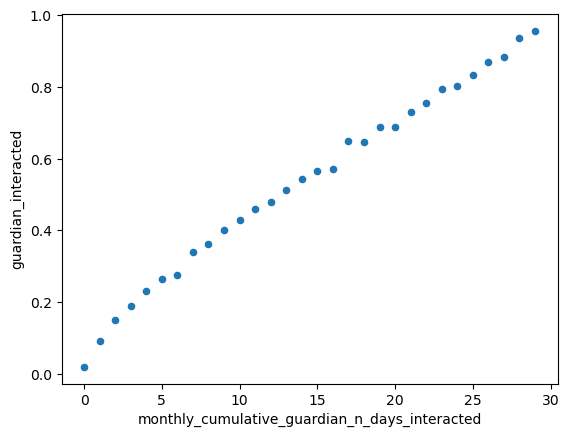

In [271]:
df.groupby("monthly_cumulative_guardian_n_days_interacted")["guardian_interacted"].mean().reset_index().plot.scatter(x="monthly_cumulative_guardian_n_days_interacted",y="guardian_interacted")

In [274]:
weekdays = ['weekday-1', 'weekday-2', 'weekday-3', 'weekday-4', 'weekday-5', 'weekday-6']

for w in weekdays:
    
    mean_w = df[df[w]==1]["guardian_interacted"].mean()
    nobs = df[df[w]==1].shape[0]
    
    print(f"{w}: {mean_w} on {nobs} observations")

weekday-1: 0.24570319191457773 on 17513 observations
weekday-2: 0.2949487371842961 on 23994 observations
weekday-3: 0.25338806725524377 on 17783 observations
weekday-4: 0.26136946925367005 on 19482 observations
weekday-5: 0.292166952544311 on 10494 observations
weekday-6: 0.3105022831050228 on 219 observations
